<a href="https://colab.research.google.com/github/gshave/example_repo/blob/master/stats_4_statisticaltheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import statistics
import math

# 4.10 Probability
In probability theory, the model is known, but the data is not

# 4.11 Estimating unknown quantities from a sample

## Samples, populations, and sampling

### Defining a population
* Ideally, pre-research you should have a clear idea of the population of interest. Usually, we make a best guess.
* Designing a study and testing hypotheses depends on the population

### Samples
* Simple random samples (with or without replacement)
* Stratified sampling
* Snowball
* Convenience

### Non-random samples
Biases in sampling method are only a problem if they cause you to draw the wrong conclusions. The sample only needs to be random wrt the relevant phenomenon of interest.

### Population parameters and sample statistics
* Statisticians are both interested in
 * real world data, and
 * operating in the pure abstract realm

For a statistician, a population is defined as a probability distribution.
* Sample statistics are the things you calculate from your dataset
* Population parameters are the things you want to learn about

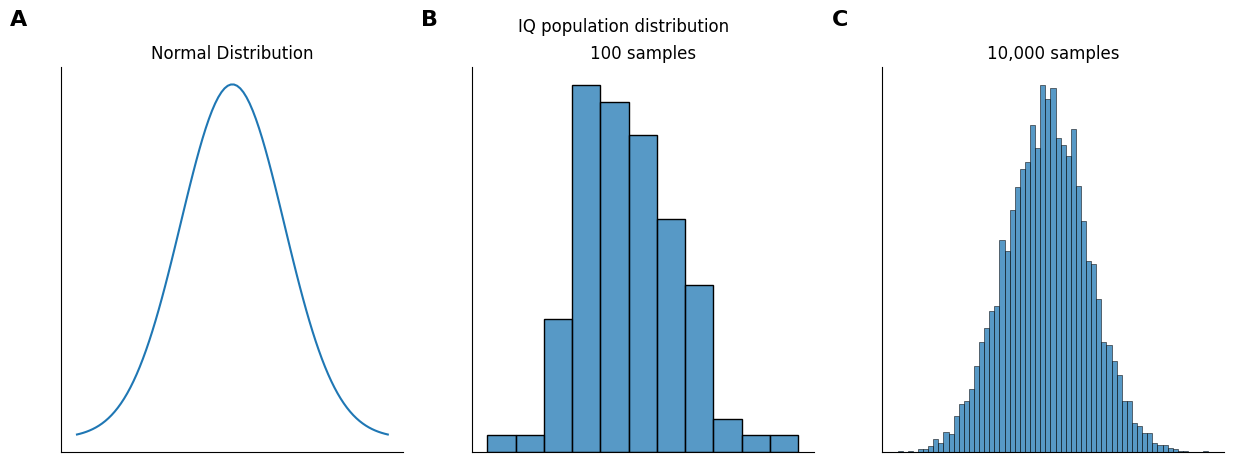

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

# arrange a grid of three plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("IQ population distribution")

# plot normal distribution
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
ax0 = sns.lineplot(x=x,y=y, ax=axes[0])

# plot histogram of 100 samples from normal distribution
IQ = np.random.normal(loc=100,scale=15,size=100)
ax1 = sns.histplot(IQ, ax=axes[1])

# plot histogram of 10000 samples from normal distribution
IQ = np.random.normal(loc=100,scale=15,size=10000)
ax2 = sns.histplot(IQ,ax=axes[2])

# add titles, labels, and formatting
labels = ['A', 'B', 'C']
titles = ['Normal Distribution', '100 samples', '10,000 samples']
for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.text(-0.1, 1.15, labels[i], transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top', ha='right')
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.tick_params(axis='both',
                   which='both',
                   bottom=False,
                   left=False)

# remove top and bottom spines
sns.despine()

## The law of large numbers
When applied to the sample mean, the law states that
* as the sample approaches inf, the sample mean approaches the population mean.

## Sampling distributions and the central limit theorem
The law of large numbers isn't very useful in practice: our sample will not approach inf.



### Sampling distribution of the mean
We can repeat an experiment N times to get N sample means


In [ ]:
df = pd.DataFrame(
    {'Person 1': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 2': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 3': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 4': np.random.normal(loc=100,scale=15,size=10).astype(int),
     'Person 5': np.random.normal(loc=100,scale=15,size=10).astype(int),
    })

df['Sample Mean']=df.mean(axis=1)
df.index=['Replication '+str(i+1) for i in range(df.shape[0])]
df

,Person 1,Person 2,Person 3,Person 4,Person 5,Sample Mean
Replication 1,122,96,102,126,80,105.2
Replication 2,103,129,116,96,115,111.8
Replication 3,75,100,118,94,89,95.2
Replication 4,114,104,92,78,76,92.8
Replication 5,78,85,88,98,115,92.8
Replication 6,94,94,115,102,99,100.8
Replication 7,102,100,98,108,99,101.4
Replication 8,106,114,93,91,117,104.2
Replication 9,82,104,124,112,120,108.4
Replication 10,107,118,90,115,86,103.2


Repeat for 10,000 replications to get the sampling distribution of the mean

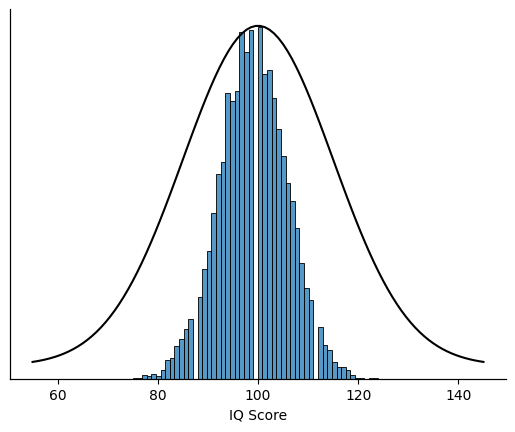

In [ ]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and calculate the sample mean for each experiment
sample_means = []
for i in range(1,10000):
    sample_mean = statistics.mean(np.random.normal(loc=100,scale=15,size=5).astype(int))
    sample_means.append(sample_mean)


# plot a histogram of the distribution of sample means, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_means, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x,y=y, ax=ax2, color='black')

# format the figure
axes=[ax, ax2]
for ax in axes:
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.set(xlabel='IQ Score')
    ax.tick_params(axis='both',
                    which='both',
                    left=False,
                    right=False)
    ax.spines[['right', 'top']].set_visible(False)

### Sampling disribution of any statistic
e.g. sampling distribution of the maximum will give a higher than average IQ distribution

### The central limit theorem

If the population has mean mu and standard deviation std, the sampling distribution of the mean also has mean mu, and SEM = std / sqrt(N)

* the mean of the sampling distribution is the same as the mean of the population
* SEM gets smaller as the sample size increases (div sqrt(N))
* the shape of the sampling dsitribution becomes normal as the sample size increases

standard error = std(sampling distribution)

SO large experiments are more reliable than small ones AND lots of things we want to measure end up being normally distributed (as they are averages of other quantities)


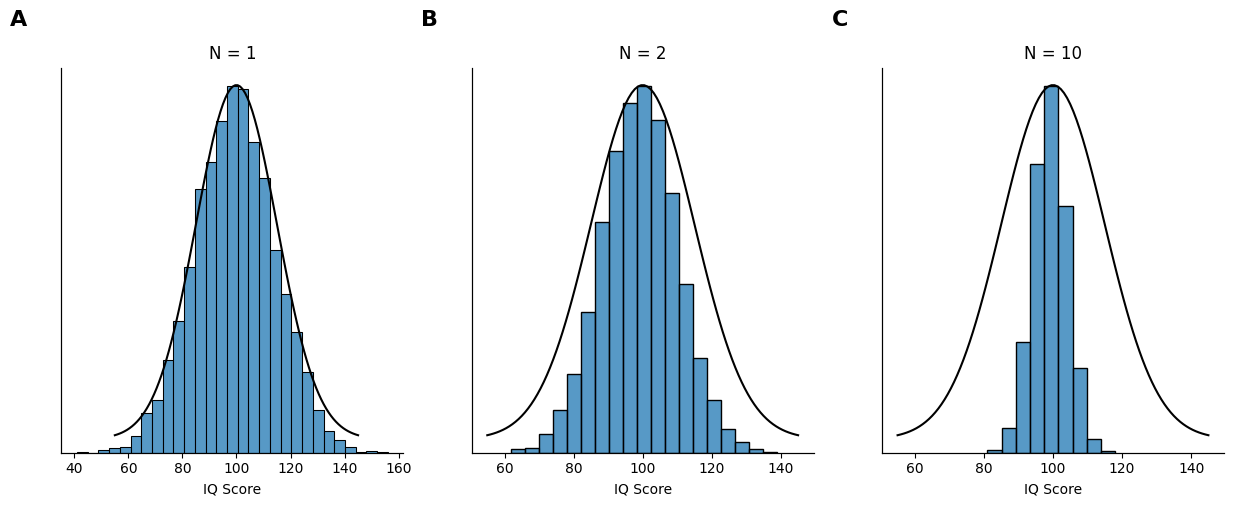

In [ ]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# arrange a grid of three plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


labels = ['A', 'B', 'C']
titles = ['N = 1', 'N = 2', 'N = 10']

# run 10000 simulated experiments with either 1, 2, or 10 subjects each, and calculate the sample mean for each experiment
for s,n in enumerate([1, 2, 10]):
    sample_means = []
    for i in range(1,10000):
        sample_mean = statistics.mean(np.random.normal(loc=100,scale=15,size=n).astype(int))
        sample_means.append(sample_mean)

    # plot a histogram of the distribution of sample means, together with the population distribution
    ax1 = sns.histplot(sample_means, ax=axes[s], binwidth=4)
    ax1.set_title(titles[s])
    ax1.text(-0.1, 1.15, labels[s], transform=ax1.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')
    ax2 = ax1.twinx()
    sns.lineplot(x=x,y=y, color='black')


    # format the figures
    subaxes=[ax1, ax2]
    for ax in subaxes:
        ax.set(yticklabels=[])
        ax.set(ylabel=None)
        ax.set(xlabel='IQ Score')
        ax.tick_params(axis='both',
                    which='both',
                    left=False,
                    right=False)
        ax.spines[['right', 'top']].set_visible(False)

As the sample size increases, the sampling distribution of the mean looks increasingly normal no matter what your population distribution looks like.

## Estimating population parameters
Parameters differ across populations.

We should provide "test norms" that can apply to different populations e.g. age groups, nationalities etc.

When comparing a metric across populations, we need to estimate population parameters from a sample of data. We can't assume population parameters are the same.

The sample statistic and the estimate of the population parameter are different. The sample statistic describes your data, the estimate is a guess about the population.

### Estimating the population mean
Often just the average sample mean

The average sample mean is an unbiased estimator - no matter the sample size, it equals the population mean.

### Estimating the population std

The average sample std is a biased estimator - it is smaller than the population std

Divide the variance by N-1 rather than N to get an unbiased estimator of the population variance. Dividing by N gives the sample variance.

### Estimating a confidence interval

We need to attempt to quantify the amount of uncertainty attached to our estimate.

Given true population mu and std, sample mean x_bar.

The sampling distribution of the mean is approximately normal. There is a 95% chance that a normally distributed quantity falls within 2 standard deviations of mu. The standard deviation of the sampling distribution is standard error and standard error of the mean is SEM.

SO

There is a 95% proabability that x_bar falls within 1.96 standard errors of the population mean.


We then want to know what we should believe about population parameters, given that we observed a particular sample. Rearrange to get - the range of values has a 95% probability of containing mu.

When we don't know the true population standard deviation (always), use the t-distribution to get the confidence interval. When the sample size is small, we get a much wider confidence interval representing our uncertainty.

#### Interpreting a confidence interval

CIs are frequentist tools. They don't refer to personal beliefs. It's about replication.

If we replicated an experiment numerous times, and computed a 95% CI for each replication, 95% of fthose intervals would contain the true mean.

The Bayesian claim makes a probability statement about the population mean which is not in line with a frequentist interpretation - you can't replicate a population.

The frequentist claims the population mean is fixed so no probabilistic claims can be made about it. CIs are repeatable so we can talk about the proability a CI contains the true mean, but not the probability that the true population mean falls within the CI.



#### CIs in Python

In [ ]:
# sample data
data = range(1, 25)

# method 1 - allows you to specify CI, DOF, SEM
import numpy as np
import scipy.stats as st
ci_1 = st.t.interval(confidence=0.95,
                     df=len(data)-1,
                     loc=np.mean(data),
                     scale=st.sem(data))

# method 2 - takes care of specifics, more of a black box
import statsmodels.stats.api as sms
ci_2 = sms.DescrStatsW(data).tconfint_mean()

# compare
print("Method 1: ", ci_1)
print(f"Method 2: {ci_2}")

Method 1:  (np.float64(9.514149929408497), np.float64(15.485850070591503))
Method 2: (np.float64(9.514149929408497), np.float64(15.485850070591503))


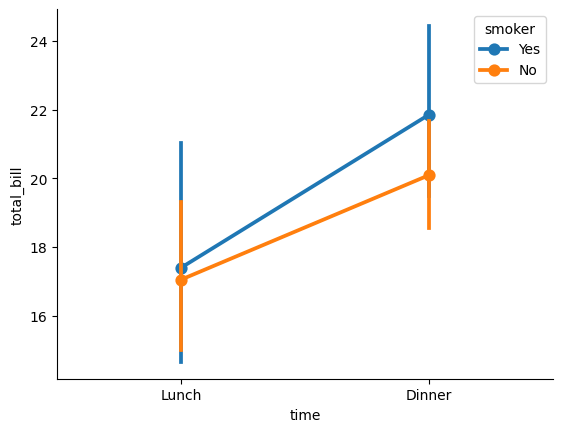

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")

sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips)
sns.despine()

<Axes: xlabel='total_bill', ylabel='tip'>

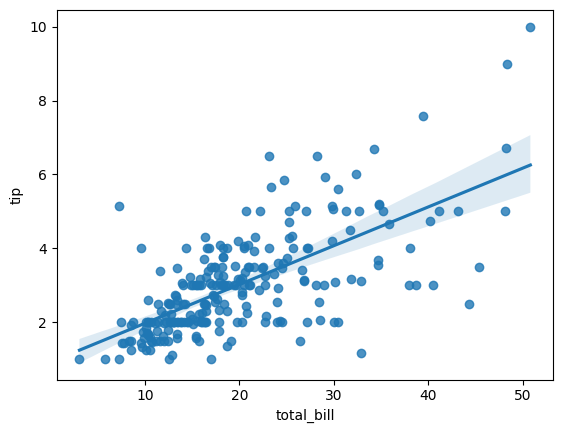

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips)

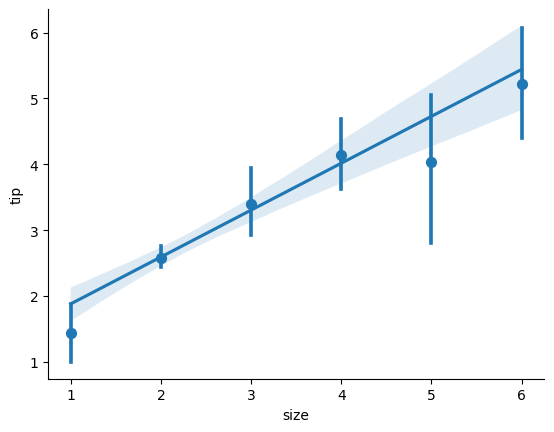

In [ ]:
# only show the mean with error-bars indicating CI for regplots with discrete variables.
sns.regplot(x="size", y="tip", data=tips, x_estimator=np.mean)
sns.despine()

# 4.12 Hypothesis Testing
## Binomial test
Test the null hypothesis that the p = 0.5, using data in which k=62 of n=100 people made the correct response

In [ ]:
from scipy.stats import binomtest
binomtest(k=62, n=100, p=0.5, alternative='two-sided')

BinomTestResult(k=62, n=100, alternative='two-sided', statistic=0.62, pvalue=0.02097873567785172)